In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Runners are assigned bases BEFORE the pitch
# This will make it easier to calculate run matrix in the future
def baserunners(data):
    
    for i in range(0, len(data)):

        # New inning means no runners on
        if data['PitchofPA'].iloc[i] == 1 and data['PAofInning'].iloc[i] == 1:
            data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]
            continue

        previous_runners = (data['runners_on_1st'].iloc[i-1], data['runners_on_2nd'].iloc[i-1], data['runners_on_3rd'].iloc[i-1])

        previous_first = previous_runners[0]
        previous_second = previous_runners[1]
        previous_third = previous_runners[2]

        previous_outs = data['OutsOnPlay'].iloc[i-1]
        previous_runs = data['RunsScored'].iloc[i-1]
        previous_pitch = data['PitchCall'].iloc[i-1]
        previous_KorBB = data['KorBB'].iloc[i-1]

        # What happens for single?
        # Single GUARANTEES a runner on first at the end of the play
        # All outs will go to the lead runner, unless they scored
        if data['PlayResult'].iloc[i-1] == 'Single':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):
                data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]          

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 0 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Fourth Combination, done    
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):
                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1] 

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 0 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]     

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 0 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                elif previous_runs == 2:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                #Runs scored = 0
                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

        elif data['PlayResult'].iloc[i-1] == 'Double':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]         

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):
                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]    

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 2:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                #Runs scored = 0
                else:
                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

        elif data['PlayResult'].iloc[i-1] == 'Triple':

            data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1] 

        elif data['PlayResult'].iloc[i-1] == 'HomeRun':

            data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0] 

        # All Errors have previous_outs = 0
        # Some Errors have previous_runs > 0
        elif data['PlayResult'].iloc[i-1] == 'Error':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]   

                else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]  

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 3:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                if previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]


                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                elif previous_runs == 3:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]    

                else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]            

        # FieldersChoice can have outs_before = 0 or 1
        # FieldersChoice can have runs_before = 0 or 1
        elif data['PlayResult'].iloc[i-1] == 'FieldersChoice':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1 or previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]


                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]


        # Out means outs_before must be >= 1
        # Out means runs_before can equal 0 or 1
        elif data['PlayResult'].iloc[i-1] == 'Out':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1 or previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]           


                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]   

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]  

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]           

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]



            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 2:


                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_runs == 2:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 3:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]


        # outs_before can equal 1 or 2
        # runs_before can equal 0 or 1
        elif data['PlayResult'].iloc[i-1] == 'Sacrifice': 

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]


            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]         

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]  

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]           

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]             


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:
                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]


            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]


            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]



            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]



        # Use PitchCall along with following scenarios scenarios
        # RunsScored = 0 AND OutsOnPlay = 0: BallIntentional, Undefined, BallinDirt
        # RunsScored = 0 or 1 AND OutsOnPlay = 0: Ball, HitByPitch, BallCalled
        # RunsScored = 0 AND OutsOnPlay = 0 or 1: StrikeCalled, FoulBall, StrikeSwinging
        # RunsScored = 0 or 1 AND OutsOnPlay = 0 or 1: 



        # Assuming All Walks can only be one run
        # If not a walk then 0 runs scored
        # Does not account for stolen bases
        elif data['PlayResult'].iloc[i-1] == 'Undefined':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]  

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]         

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]    


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1] 


            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0] 

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0] 


            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1] 

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]
    
    # Adds a column that encodes each runner state
    runners_dict = {(0,0,0):0, (1,0,0):1, (0,1,0):2, (1,1,0):3, (0,0,1):4, (1,0,1):5, (0,1,1):6, (1,1,1):7}
    data['runners_code'] = data.apply(
        lambda row: -1 if pd.isnull(row['runners_on_1st']) or pd.isnull(row['runners_on_2nd']) or pd.isnull(row['runners_on_3rd'])
        else runners_dict[(row['runners_on_1st'], row['runners_on_2nd'], row['runners_on_3rd'])], axis=1)
                                   
    return

In [3]:
# Function that encodes each count state
def count(data):
    
    count_dict = {(0,2):0, (1,2):1, (0,1):2, (2,2):3, (1,1):4, (0,0):5, 
                  (1,0):6, (2,1):7, (3,2):8, (2,0):9, (3,1):10, (3,0):11}
    data['count_code'] = data.apply(lambda row: count_dict[(row['Balls'], row['Strikes'])], axis=1)
    
    return

In [4]:
# Function that calculates the number of runs scored in an inning after each pitch
# This is needed to calculate the run expectancy matrix
def runs_scored(data):
    
    data['tot_runs_scored'] = None
    runs = 0
    
    for i in range(len(data)-1, -1, -1):
        runs += data['RunsScored'].iloc[i]
        data.loc[i, 'tot_runs_scored'] = runs
        if i == len(data) - 1:
            pass
        elif data['Inning'].iloc[i] != data['Inning'].iloc[i+1]:
            runs = 0
            
    return

In [5]:
data = pd.read_csv('~/Downloads/Ultimate_UCSB_24 - Ultimate_UCSB_24.csv', low_memory=False)
data.head()

,PitchNo,Date,Time,Umpire,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
0,1,2/16/2024,05:35.8,"One, Day",1,1,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
1,2,2/16/2024,05:50.3,"One, Day",1,2,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,NaN,NaN,High,High,High,Estimated,Estimated,NaN,NaN,NaN
2,3,2/16/2024,11:13.5,"One, Day",2,1,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
3,4,2/16/2024,11:32.2,"One, Day",2,2,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
4,5,2/16/2024,12:26.4,"One, Day",2,3,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,NaN,NaN,High,High,High,High,Low,NaN,NaN,NaN


In [6]:
# Adding baserunners, count, and total runs scored columns
baserunners(data)
count(data)
runs_scored(data)
data.head()

,PitchNo,Date,Time,Umpire,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,...,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,runners_on_1st,runners_on_2nd,runners_on_3rd,runners_code,count_code,tot_runs_scored
0,1,2/16/2024,05:35.8,"One, Day",1,1,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,5,3
1,2,2/16/2024,05:50.3,"One, Day",1,2,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,Estimated,NaN,NaN,NaN,0.0,0.0,0.0,0,2,3
2,3,2/16/2024,11:13.5,"One, Day",2,1,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1,5,3
3,4,2/16/2024,11:32.2,"One, Day",2,2,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1,6,3
4,5,2/16/2024,12:26.4,"One, Day",2,3,"Vartanian, Derek",1.000169e+09,Right,CAM_CAM,...,Low,NaN,NaN,NaN,1.0,0.0,0.0,1,4,3


In [7]:
# Run expectancy matrix
shape = (3, 8, 12)
run_exp_mat = np.full(shape, None, dtype=object)
for i in range(run_exp_mat.shape[0]):
    for j in range(run_exp_mat.shape[1]):
        for k in range(run_exp_mat.shape[2]):
            run_exp_mat[i, j, k] = np.mean(data['tot_runs_scored'][(data['Outs']==i) & 
                                                (data['runners_code']==j) & 
                                                (data['count_code']==k)])
run_exp_mat = np.array(run_exp_mat, dtype=float)
run_exp_mat

array([[[0.83333333, 0.70724638, 0.88131868, 0.78965517, 0.96067416,
         0.91845494, 0.98575499, 1.02222222, 0.82105263, 0.97478992,
         1.16470588, 1.3125    ],
        [0.81355932, 1.38235294, 1.14285714, 1.15217391, 1.66666667,
         1.49593496, 1.78571429, 1.77272727, 1.47368421, 1.32352941,
         2.04166667, 2.1       ],
        [0.9       , 1.25      , 1.66666667, 1.85714286, 1.8       ,
         1.88888889, 1.80952381, 1.71428571, 2.        , 2.5       ,
         2.8       , 3.2       ],
        [1.09090909, 1.04166667, 1.26190476, 0.9       , 1.18518519,
         1.66666667, 1.53125   , 1.23529412, 1.53333333, 1.53846154,
         1.83333333, 3.        ],
        [       nan, 3.33333333, 2.        , 3.83333333, 2.375     ,
         2.30769231, 2.85714286, 1.85714286, 4.        , 2.5       ,
         2.        ,        nan],
        [5.        , 5.        , 4.5       , 5.        ,        nan,
         2.16666667, 1.        ,        nan,        nan, 1.        ,
  

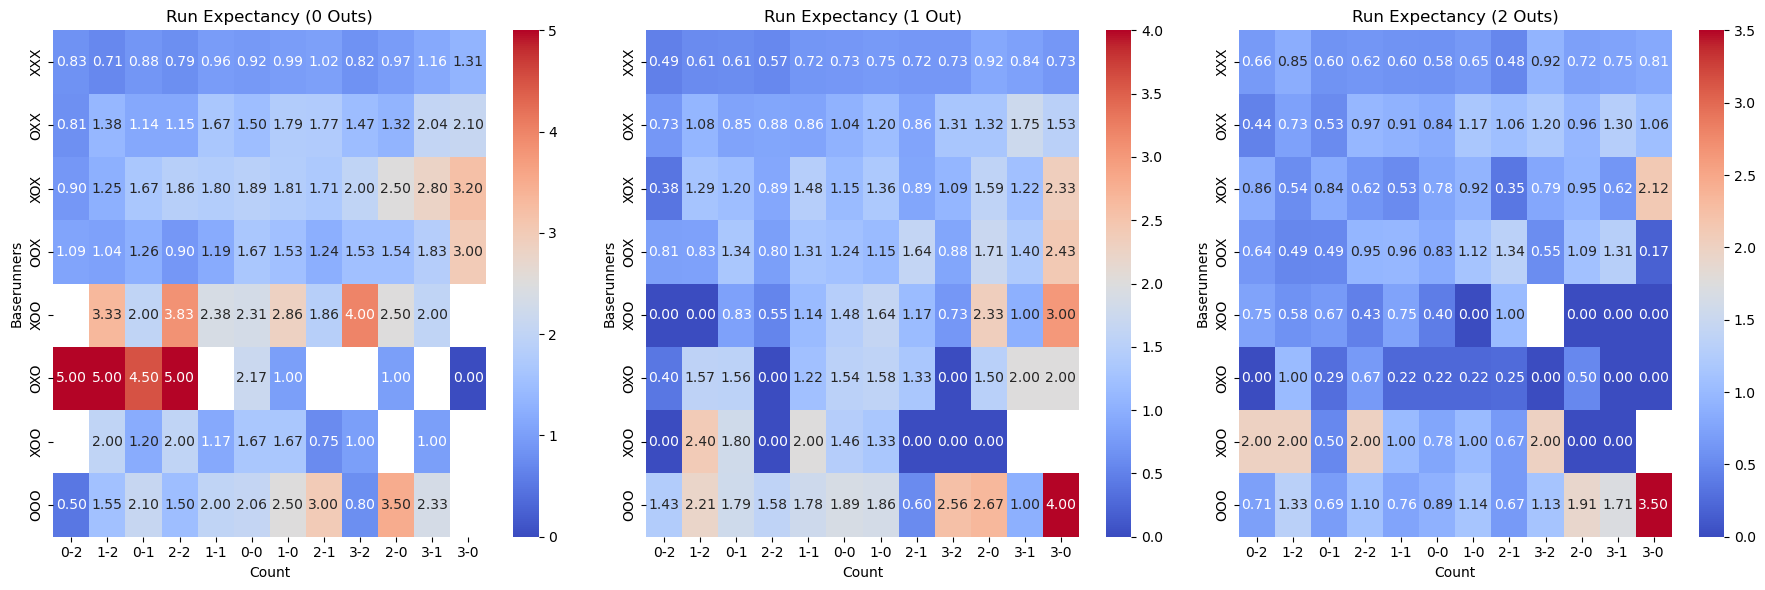

In [8]:
row_labels = ['XXX', 'OXX', 'XOX', 'OOX', 'XOO', 'OXO', 'XOO', 'OOO']
col_labels = ['0-2', '1-2', '0-1', '2-2', '1-1', '0-0', '1-0', '2-1', '3-2', '2-0', '3-1', '3-0']

# Create a 1x3 subplot for the three heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each heatmap for outs 0, 1, and 2
for out in range(3):
    sns.heatmap(run_exp_mat[out, :, :], annot=True, fmt='.2f', cmap='coolwarm',
                xticklabels=col_labels, yticklabels=row_labels, ax=axes[out])
    if out == 1:
        axes[out].set_title(f'Run Expectancy ({out} Out)')
    else:
        axes[out].set_title(f'Run Expectancy ({out} Outs)')
    axes[out].set_xlabel('Count')
    axes[out].set_ylabel('Baserunners')

plt.tight_layout()